# Задание 1.Дихотомия и метод Ньютона


1. Реализовать в виде функций
2. Сделать ползунок для перебора значений вх.параметров
3. Сделать вывод 6 кадров нахождения решения и оформить через массив графиков
4. Сравнить с тем, что дает solve

In [51]:
y = x**3 - 9*x**2 + 23*x -15
show(y)

x^3 - 9*x^2 + 23*x - 15

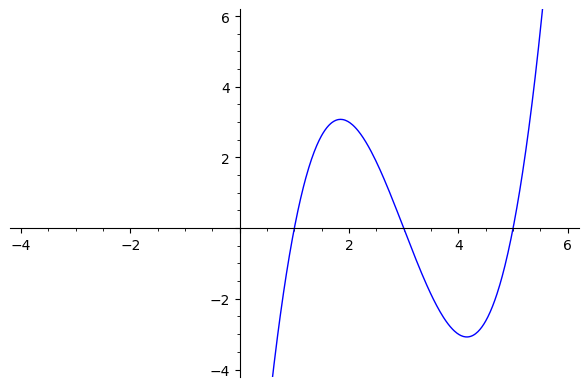

In [52]:
plot(y, xmin = -4, xmax = 6, ymin = -4, ymax = 6)

In [53]:
def diсhotomy(func, left, right, eps=1e-15, visualization=False):
    '''
    func - функция, к которой применяем метод дихотомии
    left, right - границы интервала поиска решения
    eps - точность
    visualization - визуализация
    
    Возвращает: n(left) - численное решение уравнения func=0
                (n(left), plots_array) - решение уравнения и массив графиков для визуализации (если visualization == True)
                'Error' в случае ошибки
    '''
    
    func_plot = plot(y, (x, left-0.1, right+0.1), ymin=-4, ymax=5) # график функции
    plots_array = [] # массив графиков для визуализации
    point_left = left
    point_right = right # копируем границы интервала. эти копии будут использоваться при отображении подписей к графикам
    
    iterations = 0 # количество итераций (и отрисованных графиков) - чтобы знать, что их не меньше 6
    
    if not visualization:
        iterations = 6 # если графики рисовать не нужно, то не будем отслеживать количество итераций
    
    while abs(right - left) > eps or iterations < 6:
        mid = (left + right) / 2
        if func(x=left) * func(x=mid) > 0:
            left = mid
        elif func(x=right) * func(x=right) > 0:
            right = mid
        else:
            if visualization:
                return ('Error', None)
            else:
                return 'Error'
        
        if visualization:
            iterations += 1
            plots_array.append(((point((mid, func(mid)), color="red", size=100)) + func_plot)
                + text((r"$x={}, diff={}, iter={}$").format(mid, abs(func(mid)), iterations), ((point_left+point_right) / 2, -5), fontsize=14, color="black"))
        
    if visualization:
        return (n(left), plots_array)
    else:
        return n(left)

In [54]:
diсhotomy(y, -1, 2.5)

1.00000000000000

In [55]:
diсhotomy(y, 2.5, 4)

3.00000000000000

In [56]:
diсhotomy(y, 4, 6)

5.00000000000000

In [57]:
solve(y,x)

[x == 1, x == 5, x == 3]

In [58]:
@interact
def diсhotomy_interactive(left=(0, 6, 0.5), right=(0, 6, 0.5)):
    print([left, right])
    if left >= right:
        print('Ошибка. Правая граница интервала должа быть больше левой.')
    else:
        result, plots = diсhotomy(y, left, right, eps=1e-2, visualization=True)
        if result == 'Error':
            print('Ошибка. На этом интервале нет экстремума или их больше одного.')
        else:
            print('Ответ:', result)
            graphics_array([[plots[-6 + i], plots[-6 + i + 1]] for i in range(0, 6, 2)]).show(figsize=15)

Interactive function <function diсhotomy_interactive at 0x6ffdf7ff4b90> with 2 widgets
  left: FloatSlider(val…

In [59]:
def newton(func, left, right, eps=1e-15, visualization=False):
    '''
    func - функция, к которой применяем метод Ньютона
    left, right - границы интервала поиска решения
    eps - точность
    visualization - визуализация
    
    Возвращает: next - численное решение уравнения func=0
                (next, plots_array) - решение уравнения и массив графиков для визуализации (если visualization == True)
    '''
    
    func_plot = plot(y, (x, left-0.1, right+0.1), ymin=-4, ymax=5) # график функции
    plots_array = [] # массив графиков для визуализации
    
    iterations = 0 # количество итераций (и отрисованных графиков) - чтобы знать, что их не меньше 6
    if not visualization:
        iterations = 6 # если графики рисовать не нужно, то не будем отслеживать количество итераций
    
    df = func.derivative()
    cur = left
    next = (left + right) / 2
    
    while abs(next - cur) > eps or iterations < 6:
        if visualization:
            iterations += 1
            tangent = func(x=cur) + df(x=cur) * (x - cur) # уравнение касательной в точке
            plots_array.append(((plot(tangent, (x, left-0.1, right+0.1), ymin=-9, ymax=5, color="red")) + func_plot)
                + text((r"$y={}$" + "\n" + r"$x={}, diff={}, iter={}$").format(latex(tangent), cur, abs(func(cur)), iterations), ((left + right) / 2, -5), fontsize=14, color="black"))
        
        cur = next
        next = cur - func(x=cur) / df(x=cur)
    
    if visualization:
        return (cur, plots_array)
    else:
        return cur

In [60]:
newton(y, -1, 2.5)

1.00000000000000

In [61]:
newton(y, 2.5, 4)

3.00000000000000

In [62]:
newton(y, 4, 6)

5

In [63]:
@interact
def newton_interactive(left=(0, 6, 0.5), right=(0, 6, 0.5)):
    print([left, right])
    if left >= right:
        print('Ошибка. Правая граница интервала должа быть больше левой.')
    else:
        result, plots = newton(y, left, right, eps=1e-2, visualization=True)
        print('Ответ:', result)
        graphics_array([[plots[-6 + i], plots[-6 + i + 1]] for i in range(0, 6, 2)]).show(figsize=15)

Interactive function <function newton_interactive at 0x6ffdf80220e0> with 2 widgets
  left: FloatSlider(value=…

In [64]:
solve(y,x)

[x == 1, x == 5, x == 3]

# Задание 2.Нод
1. Реализовать расширенный алгоритм Евклида
2. Получить НОД, сравнить его с результатами от gcd()
3. Получить представление НОД в виде: f*u + v*g 

In [107]:
R.<x> = PolynomialRing(QQ)
f = 126*x**6 - 54*x**5 - 28*x**3 + 12*x**2 + 14*x - 6
g = -42*x**5 + 39*x**4 - 9*x**3 - 189*x + 81
show(f)
show(g)

126*x^6 - 54*x^5 - 28*x^3 + 12*x^2 + 14*x - 6

-42*x^5 + 39*x^4 - 9*x^3 - 189*x + 81

In [108]:
gcd_auto = gcd(f, g)
show(gcd_auto)

x - 3/7

In [109]:
def bezout(f, g):
    u, uu, v, vv = 1, 0, 0, 1
    while g != 0:
        q = f // g
        r = f % g
        f, g = g, r
        u, uu = uu, u - uu*q
        v, vv = vv, v - vv*q
    return (f, u, v)


In [110]:
gcd_bezout, u, v = bezout(f, g)
show("GCD = ", gcd_bezout(x))
show("u = ", u(x))
show("v = ", v(x))

'GCD = ' -5585932569209944/29199662027163*x + 797990367029992/9733220675721

'u = ' -2208196/28078299*x^3 + 2206657991486/29199662027163*x^2 - 49663432138/3244406891907*x - 562474997414/29199662027163

'v = ' -2208196/9359433*x^4 + 1058465629660/9733220675721*x^3 + 82261925588/9733220675721*x^2 - 99326864276/87598986081489*x + 88540601892796/87598986081489

In [111]:
gcd_bezout_norm = gcd_bezout / gcd_bezout.coefficients()[-1]
u_norm = u / gcd_bezout.coefficients()[-1]
v_norm = v / gcd_bezout.coefficients()[-1]
show("GCD = ", gcd_bezout_norm(x))
show("u = ", u_norm(x))
show("v = ", v_norm(x))

'GCD = ' x - 3/7

'u = ' 1039937/2529636214*x^3 - 1998607/5059272428*x^2 + 404829/5059272428*x + 509443/5059272428

'v = ' 3119811/2529636214*x^4 - 1438005/2529636214*x^3 - 111759/2529636214*x^2 + 44981/7588908642*x - 40096351/7588908642

In [112]:
u_norm * f + v_norm * g


x - 3/7

# Задание 3. Поверхность второго порядка
1. Упростить, привести к каноническому виду
2. Построить исходную и упрощенную фигуру
3. Получить собственные вектора и чсила вручную


In [66]:
var("x y z")
f(x, y, z) = 7*x**2 + 8*x*y + 3*y**2 + 8*x*z + 6*y*z + 3*z**2 + 6*x + y + 7

In [67]:
show(f(x,y,z))

7*x^2 + 8*x*y + 3*y^2 + 8*x*z + 6*y*z + 3*z^2 + 6*x + y + 7

In [68]:
implicit_plot3d(f(x,y,z), (x, -20, 20), (y, -20, 20), (z, -20, 20))

Graphics3d Object

In [69]:
A = matrix([
    [7,4,4],
    [4,3,3],
    [4,3,3]
])
B = matrix([
    [7,4,4,3],
    [4,3,3,0.5],
    [4,3,3,0],
    [3,0.5,0,7]
])

In [115]:
# посчитаем ортогональные инварианты:
t1 = A.trace()
t2 = A[0:2, 0:2].det() + A[[0, 2], [0, 2]].det() + A[1:3, 1:3].det()
d = A.det()
delta = B.det()
show("t1 = ", t1)
show("t2 = ", t2)
show("d = ", d)
show("delta = ", delta)

't1 = ' 13

't2 = ' 10

'd = ' 0

'delta = ' -1.25000000000000

In [116]:
#найдем СВ матрицы
var("ev")
E = matrix([
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]
])

eigen_values = []
for eigen_value in solve((A - ev * E).det() == 0, ev):
    print(eigen_value.simplify(), '==', n(eigen_value.rhs()))
    eigen_values.append(eigen_value.rhs())

ev == -1/2*sqrt(129) + 13/2 == 0.821091654199726
ev == 1/2*sqrt(129) + 13/2 == 12.1789083458003
ev == 0 == 0.000000000000000


In [117]:
for eigen_value in A.eigenvalues():
    print(eigen_value)

0
0.821091654199727?
12.17890834580028?


Можно заметить, что результаты совпали

In [118]:
a = n(1 / sqrt(-delta / (eigen_values[0]**2 * t2)))
b = n(1 / sqrt(-delta / (eigen_values[1]**2 * t2)))

In [119]:
var("x1 y1 z1")
f_canonical(x1, y1, z1) = x1**2 * a + y1**2 * b - 2*z1
show(f_canonical(x1, y1, z1))

2.32239790664122*x1^2 + 34.4471547150592*y1^2 - 2*z1

In [75]:
implicit_plot3d(f_canonical(x1=x1, y1=y1, z1=z1), (x1, -20, 20), (y1, -20, 20), (z1, -20, 20))

Graphics3d Object